In [3]:
#Importing the libraries
import pandas as pd
import sklearn.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder

In [4]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd

# Loading the iris dataset
iris=datasets.load_iris()


In [5]:
path = 'https://drive.google.com/uc?export=download&id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-'
df=pd.read_csv(path)


In [6]:
#Exploring the dataset
df.shape

(150, 6)

In [7]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [8]:
#Printing the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#Dropping the id column
df.drop(['Id'],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
#Checking the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
num=LabelEncoder()
df['Species']=num.fit_transform(df['Species'].astype('str'))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

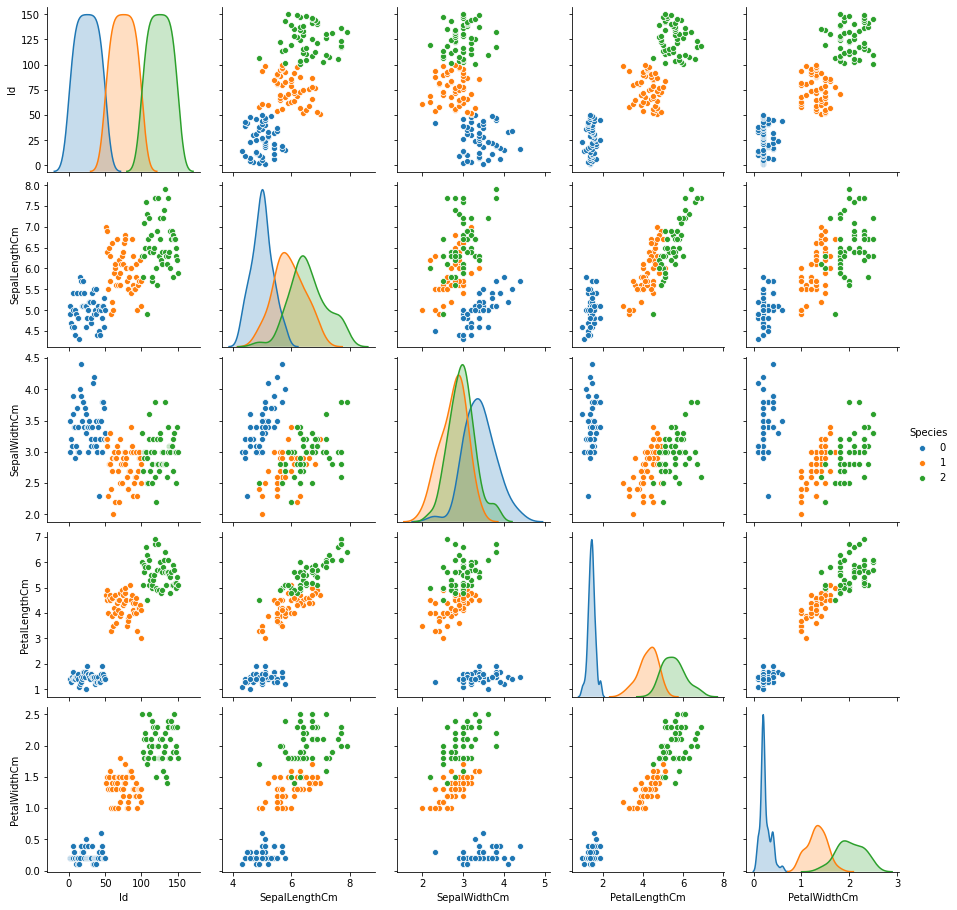

In [13]:
import seaborn as sns
sns.pairplot(df,hue="Species")


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [15]:
#Training the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
classifier.fit(x_train,y_train)
print("Training completed")

Training completed


In [16]:
#Printing the score
classifier.score(x_test,y_test)

0.9666666666666667

In [17]:
#Making predictions on testing data
y_predict = classifier.predict(x_test)

In [18]:
#Calculating accuracy of algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(200.88000000000002, 271.8, 'X[0] <= 99.5\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(133.92000000000002, 163.08, 'X[3] <= 2.6\ngini = 0.5\nsamples = 76\nvalue = [39, 37, 0]'),
 Text(66.96000000000001, 54.360000000000014, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(200.88000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(267.84000000000003, 163.08, 'gini = 0.0\nsamples = 44\nvalue = [0, 0, 44]')]

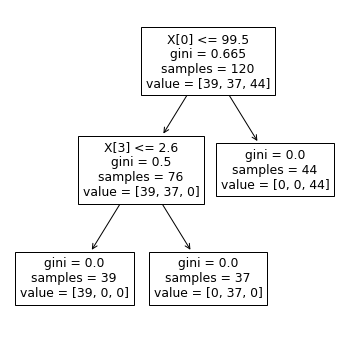

In [19]:
#Visualizing using decision tree
from sklearn import tree
plt.figure(figsize=(6,6))
graph=tree.plot_tree(classifier)
graph

In [20]:
#Decision tree with the testing data
classifier2 = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
classifier2.fit(x_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

[Text(133.92000000000002, 271.8, 'X[0] <= 48.5\ngini = 0.638\nsamples = 30\nvalue = [11, 13, 6]'),
 Text(66.96000000000001, 163.08, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0]'),
 Text(200.88000000000002, 163.08, 'X[0] <= 101.5\ngini = 0.432\nsamples = 19\nvalue = [0, 13, 6]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(267.84000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]')]

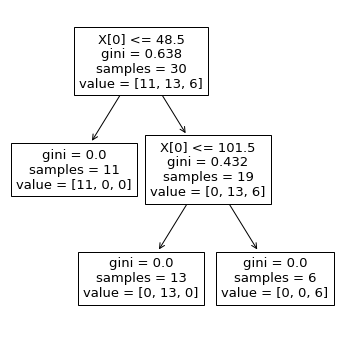

In [21]:
#Plotting the decision tree
plt.figure(figsize=(6,6))
graph=tree.plot_tree(classifier2)
graph